In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from tools.backtesting import Market, Trader
from tools import open_file, product_info, dataframe, ohlc_chart


### 0. 데이터 전처리

In [4]:
rawdata = open_file('h5py', 'custom/ohlct(20)_sr.h5', mode='r')

In [5]:
def signal(datatable):
    datatable['topdiff'] = datatable['top'].diff(1).shift(1)
    datatable['botdiff'] = datatable['bottom'].diff(1).shift(1)

    datatable['yes_top'] = datatable['top'].shift(1)
    datatable['yes_bot'] = datatable['bottom'].shift(1)
    datatable['trend'] = datatable['trend'].shift(1)


In [6]:
market = Market(feed=rawdata, signal=signal)

 preprocessing data...(48)          
Done


In [42]:
def strat(trader, inst, metric, date):
    #entrylong
    if (metric['trend'] > 0.7) and (metric['topdiff'] > 0):
        trade = trader.trades.get(inst, 'TFSR', Market.long)
        if not trade:
            entryprice = Market.get_price(inst, metric['open'], metric['high'], skid=0.25)
            position = Market.long
            stopprice = metric['yes_bot']
            if stopprice < entryprice:
                print(inst['name'])
                fig = plt.figure(figsize=(10,8))
                ax = fig.add_subplot(111)
                ohlc_chart(ax, market.feed[inst['symbol']].loc[:date] )
                ax.plot(market.feed[inst['symbol']][['top','bottom']].loc[:date], color='C1')
                plt.show()
                s=input()
                if s == '1':
                    trader.buy(inst, 'TFSR', position, date, entryprice, stopprice)
                    
                clear_output(wait=True)


In [12]:
def stop(trader, trade, metric):
    if trade['position'] == Market.long:
        return metric['bottom'] if metric['bottom'] > trade['stopprice'] else trade['stopprice']


10Year U.S. T-Note


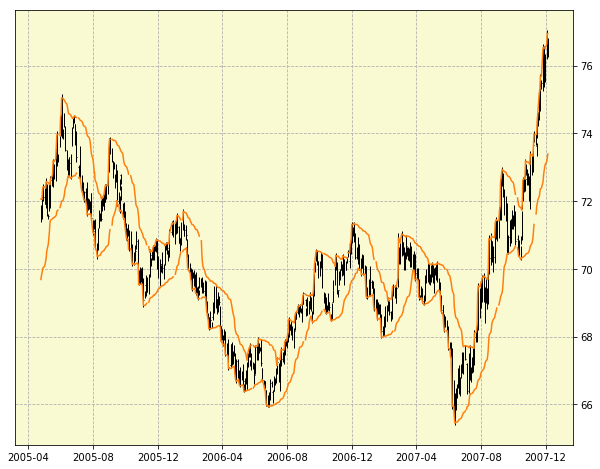

In [ ]:
%%time
trader = Trader(market=market,
                principal=100000,
                portfolio_heat=1,
                sector_heat=1,
                heat=0.1,
                max_lot= 1,
                strategy=strat,
                stop=stop)
trader.run_trade(start='2007-11-25', end='2009-01-01')

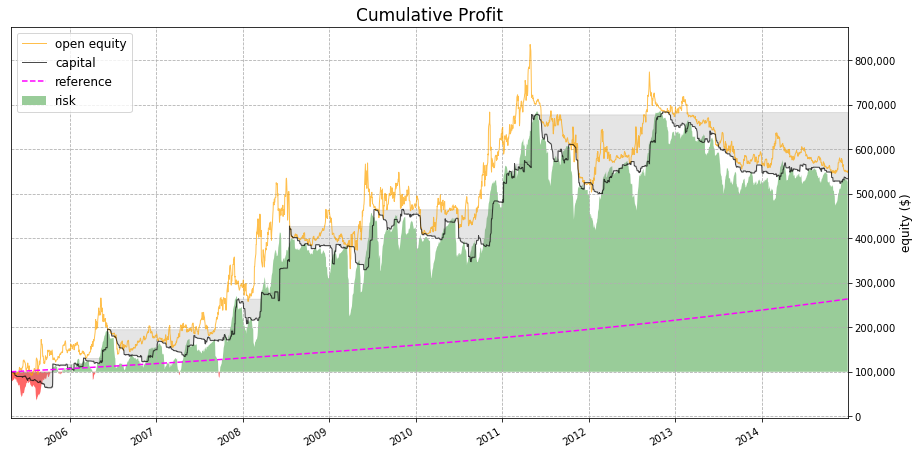

,투자금,최종자산,총손익,Bliss,ICAGR,MDD,손익비,승률,위험대비손익,평균수익,평균손실,손익표준편차,보유기간,# trades
Total,"100,000","527,406",427.41%,0.461,17.17%,37.27%,1.22,39.22%,1.99%,3656.99,-1930.89,"4,838",37 days,176.7


In [33]:
trader.summary(level=0)

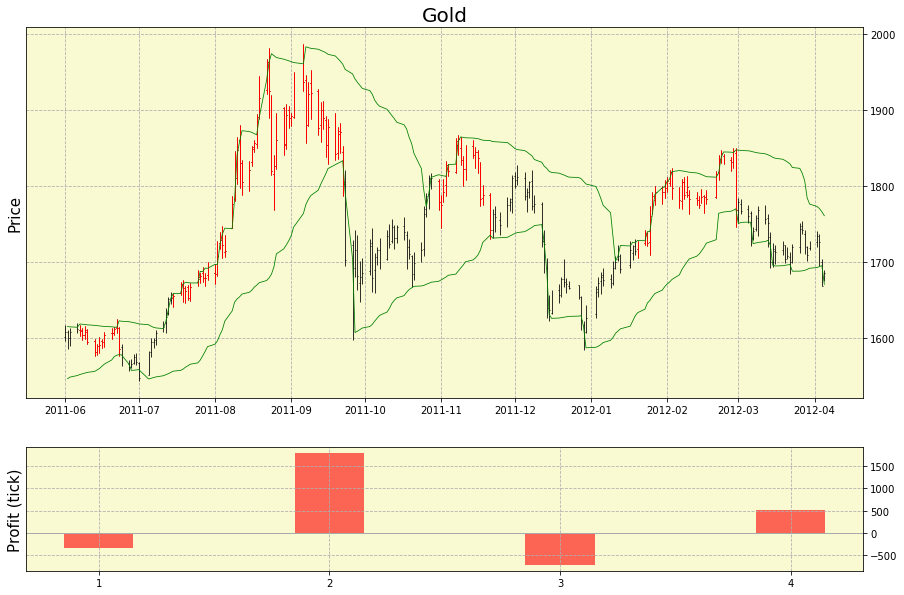

In [37]:
ax, data=trader.report('GC', start='2011-06-01', end='2012-04-05')

In [10]:
trader.tradelog[trader.tradelog['symbol']=='ZC']

,id,sector,symbol,name,position,entrydate,entryprice,stopprice,entrylot,exitdate,exitprice,exitlot,force,risk,profit,tick,strat
20,21,Grain,ZC,Corn,Long,2005-05-26,490.38,479.50,1,2005-06-30,479.50,1,True,8383.5,-550.0,-44.0,TFSR
115,123,Grain,ZC,Corn,Long,2005-12-21,441.00,439.75,1,2006-01-18,439.75,1,True,11250.0,-62.5,-5.0,TFSR
140,140,Grain,ZC,Corn,Long,2006-02-06,456.75,450.50,1,2006-03-08,450.50,1,True,11137.5,-312.5,-25.0,TFSR
154,168,Grain,ZC,Corn,Long,2006-04-10,464.19,450.50,1,2006-04-27,450.50,1,True,12220.0,-687.5,-55.0,TFSR
198,210,Grain,ZC,Corn,Long,2006-07-13,466.00,438.50,1,2006-07-21,438.50,1,True,17737.5,-1375.0,-110.0,TFSR
263,244,Grain,ZC,Corn,Long,2006-09-27,443.25,531.75,1,2006-12-18,531.75,1,True,13500.0,4425.0,354.0,TFSR
303,312,Grain,ZC,Corn,Long,2007-02-22,597.00,569.00,1,2007-03-12,569.00,1,True,14500.0,-1400.0,-112.0,TFSR
352,363,Grain,ZC,Corn,Long,2007-06-15,552.44,517.00,1,2007-06-22,517.00,1,True,16076.0,-1775.0,-142.0,TFSR
392,425,Grain,ZC,Corn,Long,2007-09-25,507.25,476.50,1,2007-10-03,476.50,1,True,17000.0,-1537.5,-123.0,TFSR
483,440,Grain,ZC,Corn,Long,2007-10-30,506.19,631.25,1,2008-03-10,631.25,1,True,16604.5,6250.0,500.0,TFSR
